# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [58]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [59]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [60]:
#  1. Get the total rides for each city type
rides_by_type = pyber_data_df.groupby('type').count().ride_id
rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [61]:
# 2. Get the total drivers for each city type
drivers_by_type = city_data_df.groupby('type').sum().driver_count
drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [62]:
#  3. Get the total amount of fares for each city type
fares_by_type = pyber_data_df.groupby('type').sum().fare
fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [63]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = fares_by_type / rides_by_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [64]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver =  fares_by_type / drivers_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [65]:
#  6. Create a PyBer summary DataFrame. 
#summary = pd.DataFrame(data=[rides_by_type,drivers_by_type,fares_by_type,avg_fare_per_ride,avg_fare_per_driver],columns=['Total Rides','Total Drivers','Total Fares','Average Fare per Ride','Average Fare per Driver'])
pyber_summary_df = pd.DataFrame({'Total Rides':rides_by_type,'Total Drivers':drivers_by_type,'Total Fares':fares_by_type,'Average Fare per Ride':avg_fare_per_ride,'Average Fare per Driver':avg_fare_per_driver})


In [66]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [67]:
#  8. Format the columns.
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Finer-Control:-Display-Values
#https://stackoverflow.com/questions/32744997/apply-formatting-to-each-column-in-dataframe-using-a-dict-mapping

format_map = {'Total Rides':'{:,.0f}','Total Drivers':'{:,.0f}','Total Fares': '${:,.2f}','Average Fare per Ride': '${:,.2f}','Average Fare per Driver': '${:,.2f}'}
pyber_summary_df_formatted = pyber_summary_df.style.format(format_map)
pyber_summary_df_formatted


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [68]:
# 1. Read the merged DataFrame
#unsuccessful attempt to do it all in one step
#aio_fares_by_week_by_type = pyber_data_df.set_index('date').loc['2019-01-01':'2019-04-28'].groupby(['type','date']).sum().resample('W').sum().fare

In [69]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df.date = pd.to_datetime(pyber_data_df.date)
fares_by_week_by_type =  pyber_data_df.groupby(['type','date']).sum().fare

In [70]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_by_week_by_type=fares_by_week_by_type.reset_index()

In [71]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_week_by_type=fares_by_week_by_type.pivot(index='date',columns='type',values='fare')
#fares_by_week_by_type

In [72]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_by_week_by_type_df=fares_by_week_by_type.loc['2019-01-01':'2019-04-28']


In [73]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
#done above

In [74]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_by_week_by_type_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [75]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
summary_fares_by_week_by_type_df = fares_by_week_by_type_df.resample('W').sum()
#summary_fares_by_week_by_type_df

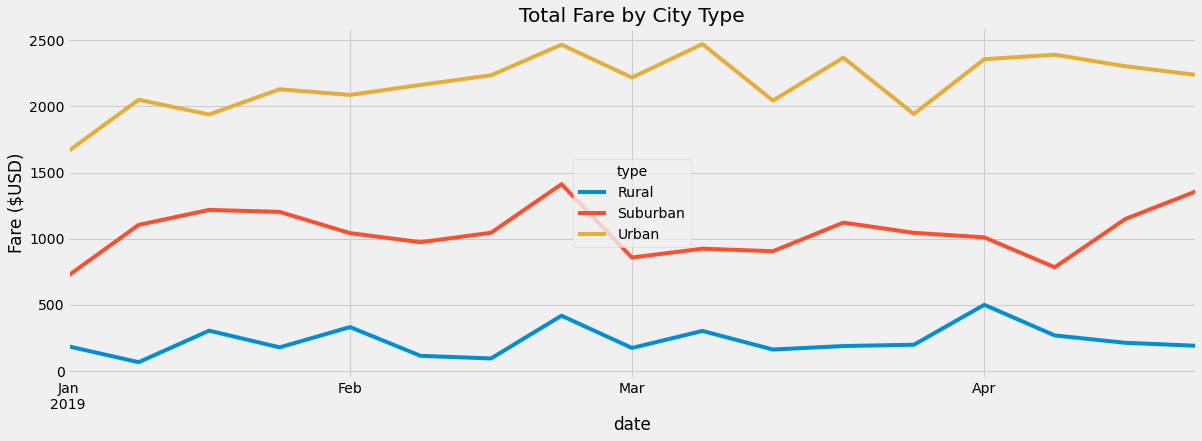

In [76]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
labels=summary_fares_by_week_by_type_df.columns
summary_fares_by_week_by_type_df.plot(kind='line',label=labels,figsize=(18,6))
plt.title('Total Fare by City Type')
plt.ylabel('Fare ($USD)')
plt.savefig('analysis/Pyber_fare_summary.png')
plt.show()